# INF-510 Computational Numerical Methods
## Fire spread model based on Linear Reaction-Convection-Diffusion Equation
### Daniel San Martín

## Linear Reaction-Convection-Diffusion Equation

The linear reaction-convection-diffusion equation is defined by

\begin{equation}
    \frac{\partial u}{\partial t} = \mu \nabla^2u - \nabla \cdot (u\textbf{v})+au,
\end{equation}

where $u$ can represent the temperature or concentration of chemical species in a domain $\Omega \in \mathbb{R}^n$, $\mu>0$ is the diffusion constant, $\textbf{v}(\textbf{x})=(v_1(\textbf{x}), ..., v_n(\textbf{x}))$ is a velocity field of flow fluid and $a(\textbf{x})$ is a reaction rate.

### Diffusion term

The model is based in the process of particles movement and this term is defined by 

\begin{equation}
    \begin{split}
        \mu \nabla^2u & = \mu\left(\frac{\partial^2 u}{\partial x_1^2} 
            + ... + \frac{\partial^2 u}{\partial x_n^2}\right). \\
    \end{split}
\end{equation}

For $\textbf{x}\in\mathbb{R}^2$ we have
\begin{equation}
    \mu \nabla^2u = \mu\left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right).
\end{equation}

### Convection term

The model includes the effect of a vector field $\textbf{v}(\textbf{x})=(v_1(\textbf{x}), ..., v_n(\textbf{x}))$ in the form 

\begin{equation}
    \begin{split}
        \nabla \cdot (u\textbf{v}) & = \sum_{i=1}^n\frac{\partial(uv_i)}{\partial x_i}.
    \end{split}
\end{equation}

For $\textbf{x}\in\mathbb{R}^2$ we have
\begin{equation}
    \begin{split}
        \nabla \cdot (u\textbf{v}) & = \frac{\partial(uv_1)}{\partial x} + \frac{\partial(uv_2)}{\partial y} \\
         & = \frac{\partial u}{\partial x}v_1 + u\frac{\partial v_1}{\partial x} +
             \frac{\partial u}{\partial y}v_2 + u\frac{\partial v_2}{\partial y}
    \end{split}
\end{equation}

### Reaction term

The reaction term is a linear approximation of chemical kinetics and is defined by $au$, where $a$ may be a real number or a scalar field.

<!--\begin{equation}
    au = a(\textbf{x})u(\textbf{x}).
\end{equation}

For $\textbf{x}\in\mathbb{R}^2$ we have $a(x,y)u(x,y)$-->

## Fire spreading

Assuming that we have a scalar field as fuel and a constant wind, we want to model a fire propagation (heat transport) using the PDE as follow

\begin{equation}
    \begin{split}
        \frac{\partial u}{\partial t} & = \mu \nabla^2u - \nabla \cdot (u\textbf{v})+au ~ \text{in} ~ \Omega \\
            u\big|_{\Gamma} & = f \\
            u(x,y,0) & = u_0(x,y).
    \end{split}
\end{equation}

where $\Gamma=\partial\Omega$, the domain's boundary.

### Numerical Methods

To compute the derivatives we use Chebyshev differentiation matrix for spatial domain and for time domain we use Euler's Method.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.interpolate import interp2d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [90]:
# Chebyshev differentiation matrix
def cheb(N):
    if N == 0:
        D = 0
        x = 1
        return D, x
    x = np.cos(np.pi * np.arange(N + 1) / N)
    c = np.hstack((2, np.ones(N - 1), 2)) * ((-1.)**np.arange(N + 1))
    X = np.tile(x, (N + 1, 1)).T
    dX = X - X.T
    D = np.outer(c, 1./c) / (dX + np.eye(N + 1))
    D = D - np.diag(np.sum(D.T, axis=0))
    return D,x

In [91]:
# Plot initial condition
def plotIC(x, y, u):
    plt.title("Initial Condition")
    fine = np.linspace(-1, 1, 4*N)
    Xf, Yf = np.meshgrid(fine, fine)
    f = interp2d(x, y, u, kind='cubic')
    u = f(fine, fine)
    count = plt.contourf(Xf, Yf, u, cmap=cm.jet)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

In [92]:
# Plot reaction rate
def plotReaction(x, y, a):
    plt.title("Reaction Rate")
    fine = np.linspace(-1, 1, 4*N)
    Xf, Yf = np.meshgrid(fine, fine)
    f = interp2d(x, y, a, kind='cubic')
    a = f(fine, fine)
    count = plt.contourf(Xf, Yf, a, cmap=cm.jet)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

In [93]:
# Plot fluid flow
def plotFluid(Xv, Yv, V1N, V2N):
    plt.title("Fluid")
    if (np.all(V1N==0) and np.all(V2N==0)): return
    quiv = plt.quiver(Xv, Yv, V1N, V2N)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

In [118]:
# Plot solution
def plot(t, u, d, i, elev, azim):
    fine = np.linspace(-1, 1, 4*N)
    Xf, Yf = np.meshgrid(fine, fine)
    f = interp2d(x, y, u[i], kind='cubic')
    v = f(fine, fine)    
    vmn, vmx = np.min(u[0]), np.max(u[0])
    fig = plt.figure(figsize=(10, 8))
    if d == 2:        
        ax = fig.gca(projection='3d')                        
        surf = ax.plot_surface(Xf, Yf, v, rstride=1, cstride=1, cmap=cm.jet, vmin=vmn, vmax=vmx)  
        fig.colorbar(surf)
        ax.view_init(elev=elev, azim=azim)
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("u(x,y)")
        ax.set_zlim([vmn, vmx])
    else:        
        cont = plt.contourf(Xf, Yf, v, cmap=cm.jet, vmin=vmn, vmax=vmx, antialiased=True)
        fig.colorbar(cont)
        
    plt.title("$t$: " + "{:10.2f}".format(t[i]))
    plt.show()

In [95]:
# Return normalized vector field
def v(X, Y, v):
    # Vector Field
    V1 = v[0](X, Y)
    V2 = v[1](X, Y)
    speed = np.sqrt(V1**2 + V2**2)
    if np.all(speed==0): return np.zeros(X.shape), np.zeros(X.shape)
    speed[speed == 0] = 1e-16
    V1N = V1/speed
    V2N = V2/speed
    return V1, V2

In [96]:
def G(x, y):
    return np.exp(-(x**2 + y**2))

def S(x, y):
    return G(2*x, 2*y) + 0.8 * G(2*x + 1.25, 2*y + 1.25) + 0.5 * G(2*x - 1.25, 4*y + 1.25) \
        - 0.5 * G(3*x - 1.25, 3*y - 1.25) + 0.35 * G(2*x + 1.25, 2*y - 1.25) \
        + 0.8 * G(x - 1.25, 3*y + 1.5) + 1.2 * G(x + 1.25, 3*y - 1.85)

In [97]:
def solvePDE(mu, dt, T, A, V1, V2, W):
    u = [W]
    t = [0]

    # Euler
    for n in range(T):

        diff = mu*(np.dot(W, D2x) + np.dot(D2y, W))    
        conv = np.dot(np.dot(W, Dx), V1) + np.dot(W, np.dot(V1, Dx)) \
            + np.dot(np.dot(Dy, W), V2) + np.dot(W, np.dot(Dy, V2))
        reac = np.dot(A, W)

        W = W + dt*(diff - conv + reac) #- conv 

        # Border condition
        W[0,:] = np.zeros(N+1)
        W[-1,:] = np.zeros(N+1)
        W[:,0] = np.zeros(N+1)
        W[:,-1] = np.zeros(N+1)

        if (n % 2 == 0): # keep some plots
            u.append(W)
            t.append(n*dt)
            
    return t, u

In [98]:
def plotExperiment(t, u):
    slider = widgets.IntSlider(
        value=0, 
        min=0, 
        max=len(t)-1, 
        step=1, 
        description='Time step:',
        continuous_update=False,
        readout=True,
        readout_format='d'
    )

    ele = widgets.IntSlider(
        value=30,
        min=0,
        max=90,
        step=10,
        description='Elevation:'
    )

    azi = widgets.IntSlider(
        value=220,
        min=220,
        max=270,
        step=10,
        description='Azimuth:'
    )

    drop = widgets.Dropdown(
        options={'Contour': 1, 'Surface': 2},
        value=1,
        description='Plot:',
    )
    
    widgets.interact(plot, t=widgets.fixed(t), u=widgets.fixed(u), d=drop, i=slider, elev=ele, azim=azi)

In [99]:
def experiment(param, plots=False):
    A = param['a'](X, Y)
    V1, V2 = v(X, Y, param['v'])
    W = param['u0'](X, Y)
    
    if plots:
        plotIC(X, Y, W)
        plotFluid(Xv, Yv, V1, V2)
        plotReaction(X, Y, A)
    
    t, u = solvePDE(
        param['mu'], 
        param['dt'], 
        param['T'], 
        A, 
        V1, 
        V2,
        W
    )
    return t, u

In [100]:
# Fixed variables
N = 20

# x variable in [-1,1], Chebyshev
Nx = N; Dx, x = cheb(Nx)
D2x = np.dot(Dx, Dx);

# y variable in [-1,1], Chebyshev
Ny = N; Dy, y = cheb(Ny) 
D2y = np.dot(Dy, Dy)

# Grids
X, Y = np.meshgrid(x,y)
Xv, Yv = np.mgrid[-1:1:21j, -1:1:21j]

# Finer mesh
fine = np.linspace(-1, 1, 4*N)
Xf, Yf = np.meshgrid(fine, fine)

In [135]:
# Reaction Rate
a = lambda x, y: 5*S(X, Y)

# Fluid 
v1 = lambda x, y: 1
v2 = lambda x, y: np.sin(x**2 + y**2)

# Initial condition
u0 = lambda x, y: 1e3*np.exp(-40*((X+.5)**2 + (Y+.5)**2))

## Experiments

### Only Diffusion

In [123]:
param1 = {
    'mu': .5,
    'dt': 1e-5,
    'T': 4000,
    'a': np.vectorize(lambda x, y: 0),
    'v': (np.vectorize(lambda x, y: 0), np.vectorize(lambda x, y: 0)),
    'u0': u0
}

In [124]:
t1, u1 = experiment(param1)

In [125]:
plotExperiment(t1, u1)

interactive(children=(Dropdown(description='Plot:', options={'Contour': 1, 'Surface': 2}, value=1), IntSlider(value=0, continuous_update=False, description='Time step:', max=2000), IntSlider(value=30, description='Elevation:', max=90, step=10), IntSlider(value=220, description='Azimuth:', max=270, min=220, step=10), Output()), _dom_classes=('widget-interact',))

### Diffusion + Convection

In [126]:
param2 = {
    'mu': .5,
    'dt': 1e-5,
    'T': 4000,
    'a': np.vectorize(lambda x, y: 0),
    'v': (v1, v2),
    'u0': u0
}

In [127]:
t2, u2 = experiment(param2)

In [128]:
plotExperiment(t2, u2)

interactive(children=(Dropdown(description='Plot:', options={'Contour': 1, 'Surface': 2}, value=1), IntSlider(value=0, continuous_update=False, description='Time step:', max=2000), IntSlider(value=30, description='Elevation:', max=90, step=10), IntSlider(value=220, description='Azimuth:', max=270, min=220, step=10), Output()), _dom_classes=('widget-interact',))

### Diffusion + Reaction

In [129]:
param3 = {
    'mu': .8,
    'dt': 1e-5,
    'T': 4000,
    'a': a,
    'v': (np.vectorize(lambda x, y: 0), np.vectorize(lambda x, y: 0)),
    'u0': u0
}

In [130]:
t3, u3 = experiment(param3)

In [131]:
plotExperiment(t3, u3)

interactive(children=(Dropdown(description='Plot:', options={'Contour': 1, 'Surface': 2}, value=1), IntSlider(value=0, continuous_update=False, description='Time step:', max=2000), IntSlider(value=30, description='Elevation:', max=90, step=10), IntSlider(value=220, description='Azimuth:', max=270, min=220, step=10), Output()), _dom_classes=('widget-interact',))

### Diffusion + Convection + Reaction

In [136]:
param4 = {
    'mu': .8,
    'dt': 1e-5,
    'T': 4000,
    'a': a,
    'v': (v1, v2),
    'u0': u0
}

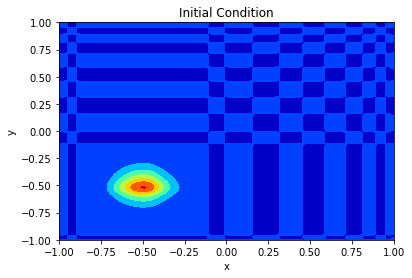

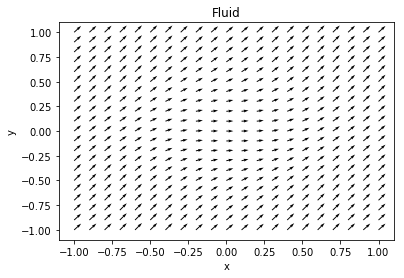

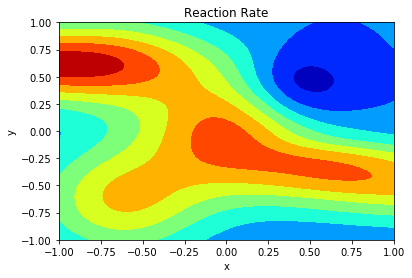

In [137]:
t4, u4 = experiment(param4, plots=True)

In [138]:
plotExperiment(t4, u4)

interactive(children=(Dropdown(description='Plot:', options={'Contour': 1, 'Surface': 2}, value=1), IntSlider(value=0, continuous_update=False, description='Time step:', max=2000), IntSlider(value=30, description='Elevation:', max=90, step=10), IntSlider(value=220, description='Azimuth:', max=270, min=220, step=10), Output()), _dom_classes=('widget-interact',))